# Micro Credit Defaulter Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Micro Credit Defaulter Data file.csv")

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#We can notice that there is an extra column named--> Unnamed: 0 which appears to be an index column,
#it would be of no use hence dropping it.

df.drop(['Unnamed: 0'], axis=1,inplace=True)


In [6]:
df.shape

(209593, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
#we can observe that almost all columns are of either integer or float type,very few are of object type
#storing object type columns into a separate dataframe
objecttypes=df.select_dtypes(include=['object'])
objecttypes

,msisdn,pcircle,pdate
0,21408I70789,UPW,20-07-2016
1,76462I70374,UPW,10-08-2016
2,17943I70372,UPW,19-08-2016
3,55773I70781,UPW,06-06-2016
4,03813I82730,UPW,22-06-2016
...,...,...,...
209588,22758I85348,UPW,17-06-2016
209589,95583I84455,UPW,12-06-2016
209590,28556I85350,UPW,29-07-2016
209591,59712I82733,UPW,25-07-2016


OBSERVATION:
    
    1) The msisdn has numeric entries,so converting this column into integer type.
    
    2)Checking the Pcircle entries ,seems all the rows has same telecom provider name.
     If all the entries are same in pcircle column, will be deleting the column.
    
    3)Will be converting the pdate column into like year ,month and date.

In [9]:
for col in objecttypes.columns:
        
        print("No.of unique values in ",col,"::",objecttypes[col].nunique())
        
        print("\n",col," \n ",objecttypes[col].value_counts())
        print("***********************************************")

No.of unique values in  msisdn :: 186243

 msisdn  
  04581I85330    7
47819I90840    7
43096I88688    6
22038I88658    6
30080I90588    6
              ..
51297I89231    1
98688I70377    1
99064I90840    1
47211I90580    1
69063I90849    1
Name: msisdn, Length: 186243, dtype: int64
***********************************************
No.of unique values in  pcircle :: 1

 pcircle  
  UPW    209593
Name: pcircle, dtype: int64
***********************************************
No.of unique values in  pdate :: 82

 pdate  
  04-07-2016    3150
05-07-2016    3127
07-07-2016    3116
20-06-2016    3099
17-06-2016    3082
              ... 
04-06-2016    1559
18-08-2016    1407
19-08-2016    1132
20-08-2016     788
21-08-2016     324
Name: pdate, Length: 82, dtype: int64
***********************************************


OBSERVATION:
    
    1)msisdn happens to be cellphone number,but there is I in the 6th place.Usually a mobile number consists of 10 digits.
       by including I it will be 11 digits.so deleting I.
        
    2)Deleting pcircle column as it has single value.
    
    3)We can notice the data belong to  year-2016 ,will be adding the month and date columns.

In [10]:
df.drop(['pcircle'], axis=1,inplace=True)

In [11]:
len(df['msisdn'][0])

11

In [12]:
df['msisdn'] = df['msisdn'].str.replace('I', '')

In [13]:
df['msisdn'] 

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4         0381382730
             ...    
209588    2275885348
209589    9558384455
209590    2855685350
209591    5971282733
209592    6506185339
Name: msisdn, Length: 209593, dtype: object

In [14]:
df['msisdn'] =df['msisdn'].astype('int64')

In [15]:
df['Year']=df['pdate'].str.split('-').str[0]
df['Month']=df['pdate'].str.split('-').str[1]
df['Date']=df['pdate'].str.split('-').str[2]

In [16]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Year,Month,Date
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,20-07-2016,20,07,2016
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,10-08-2016,10,08,2016
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,19-08-2016,19,08,2016
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,06-06-2016,06,06,2016
4,1,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,22-06-2016,22,06,2016


In [17]:
#since we have splitted the pdate column,into 3 columns,dropping pdate column
df.drop(['pdate'],axis=1,inplace=True)

In [18]:
#checking the unique values in year column.
df['Year'].nunique()

31

In [19]:
#since all the data collected is about 2016 year,dropping the year column as weel.
df.drop(['Year'],axis=1,inplace=True)

In [20]:
df['Month']=df['Month'].astype(int)
df['Date']=df['Date'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int64  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [22]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
count,209593.000000,2.095930e+05,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0
mean,0.875177,4.974956e+09,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,2016.0
std,0.330519,2.890571e+09,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,0.0
min,0.000000,4.827380e+05,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2016.0
25%,1.000000,2.465991e+09,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,2016.0
50%,1.000000,4.905684e+09,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,2016.0
75%,1.000000,7.503370e+09,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,2016.0
max,1.000000,9.999895e+09,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,2016.0


COLUMNS WITH NEGATIVE MINIMUM VALUES:
    
1)aon

2)daily_decr30=>Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

3)daily_decr90=>Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

4)rental30=>Average main account balance over last 30 days

5)rental90=>Average main account balance over last 90 days

6)last_rech_date_ma=>Number of days till last recharge of main account

7)last_rech_date_da=>Number of days till last recharge of data account

aon 

=>indicates Age On Cellular Network in days.

=>minimum value is -48,usually minimum value shoud be zero.

so checking the other columns values where aon has negative values.

In [23]:
df_aon = df[df['aon'] < 0]

In [24]:
df_aon

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
30,1,7013090843,-42.0,8.864333,8.864333,780.71,780.71,780195.4971,0.0,773,...,6.0,1.0,1.000000,6,6,1.0,0.0,0.0,6,2016
197,1,4685890841,-36.0,32.075333,32.075333,1557.53,1557.53,1.0000,0.0,1539,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,2016
322,1,302770379,-37.0,9.160000,9.160000,203.04,203.04,1.0000,0.0,770,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,2016
504,1,7567084458,-36.0,11.470333,11.470333,40.04,40.04,1.0000,0.0,770,...,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0,6,2016
603,1,5849589235,-35.0,12.474000,12.474000,1823.08,1823.08,1.0000,0.0,1539,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208716,1,1016290589,-34.0,19.260000,19.260000,714.15,714.15,1.0000,0.0,773,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,2016
209121,1,6551184450,-18.0,700.580000,700.600000,1057.72,1090.76,1.0000,0.0,770,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,7,2016
209240,1,3489670375,-28.0,10.640000,10.640000,133.35,133.35,1.0000,0.0,770,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,2016
209421,1,5171784459,-44.0,7.166667,7.166667,368.55,368.55,1.0000,0.0,773,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,2016


In [25]:
df_aon['label'].value_counts()

1    1047
0     492
Name: label, dtype: int64

Observation:
    
    notice that there are both success and failure in payment of loans.Hence assumingthe minus sign might be typo.
    
    converting the aon column to positive.

In [26]:
df['aon']=abs(df['aon'])

In [27]:
#checking for minimum value.
df['aon'].min()

1.0

In [28]:
#no.of days till last recharge of main and data accounts cant be negative.
#converting them into positive values.
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

In [29]:
df['last_rech_date_ma'].min()

0.0

In [30]:
df['last_rech_date_da'].min()

0.0

In [31]:
#creating a dataframe which has negative values in rental30 column
df_ren30=df[df['rental30']<0]
df_ren30

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
24,0,5964582735,966.0,291.563333,291.563333,-2020.09,-2020.09,0.0000,0.0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,6,2016
41,1,8558070784,545.0,113.750000,113.750000,-110.75,-110.75,6.0000,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,12.0,12.0,6,2016
77,1,9838870377,383.0,1219.782000,1238.740000,-889.14,-919.80,22.0000,0.0,3178,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,7,2016
116,1,7336570375,157.0,63.720000,63.720000,-177.48,-177.48,0.0000,0.0,0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,6,2016
117,1,4189484454,1140.0,23.833333,23.833333,-40.20,-40.20,6.0000,0.0,1547,...,6.0,0.0,2.0,12,6,0.0,5.0,5.0,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209304,1,6444290584,410.0,176.045333,176.045333,-281.12,-281.12,18.0000,0.0,10000,...,6.0,0.0,3.0,18,6,0.0,2.0,2.0,6,2016
209332,1,2736185329,1652.0,5062.936000,5194.680000,-101.16,-505.80,32.0000,0.0,8000,...,6.0,0.0,4.0,24,6,0.0,0.0,2.0,7,2016
209441,1,6562282739,918.0,444.209333,444.209333,-691.90,-691.90,1.0000,0.0,8000,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,6,2016
209466,1,5952588698,190.0,2601.750000,2622.100000,-334.62,-441.57,767980.5631,0.0,1539,...,12.0,0.0,3.0,24,12,0.0,6.0,6.0,7,2016


Creating two different dataframes 
1)one being the people who failed to repay the loan.
2)Other being the people who did repay the loan
these two dataframes are created in respect to negative values in rental 30 column.

In [32]:
#dataframe who failed to pay loan with respect to average rental balance of 30 days
df_renFail=df_ren30[df_ren30['label']==0]
df_renFail[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
24,0,-2020.09,6
246,0,-229.77,6
1469,0,-163.90,24
1777,0,-121.21,6
2681,0,-443.04,18
...,...,...,...
207113,0,-278.64,6
207949,0,-3719.25,6
208543,0,-187.00,6
209175,0,-1126.16,6


In [33]:
#dataframe who successfully pay loan with respect to average rental balance of 30 days
df_renPaid=df_ren30[df_ren30['label']==1]
df_renPaid[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
41,1,-110.75,12
77,1,-919.80,6
116,1,-177.48,12
117,1,-40.20,12
125,1,-44.88,24
...,...,...,...
209304,1,-281.12,18
209332,1,-505.80,24
209441,1,-691.90,6
209466,1,-441.57,24


OBSERVATION:
    
    We can note that eventhough the average rental balance is in negatives[which means the customer owe rent to company],
    they did repay their loans,which is most unlikely.
    
    There might be other possibility that user will not be granted loan if they have negative balance.
    This might be due to erroneous entry.So converting them to positive. 
    

In [34]:
df['rental30']=abs(df['rental30'])

In [35]:
#creating a dataframe which has negative values in rental90 column
df_ren90=df[df['rental90']<0]
df_ren90[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
24,0,-2020.09,6
41,1,-110.75,12
77,1,-919.80,6
116,1,-177.48,12
117,1,-40.20,12
...,...,...,...
209304,1,-281.12,18
209332,1,-505.80,24
209441,1,-691.90,6
209466,1,-441.57,24


In [36]:
#dataframe who failed to pay loan with respect to average rental balance of 90 days
df_ren90Fail=df_ren90[df_ren90['label']==0]
df_ren90Fail[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
24,0,-2020.09,6
246,0,-229.77,6
1309,0,-83.02,12
1469,0,-163.90,24
1777,0,-121.21,6
...,...,...,...
207113,0,-278.64,6
207949,0,-3719.25,6
208543,0,-187.00,6
209175,0,-1126.16,6


In [37]:
#dataframe who failed to pay loan with respect to average rental balance of 90 days
df_ren90Pass=df_ren90[df_ren90['label']==1]
df_ren90Pass[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
41,1,-110.75,12
77,1,-919.80,6
116,1,-177.48,12
117,1,-40.20,12
125,1,-44.88,24
...,...,...,...
209304,1,-281.12,18
209332,1,-505.80,24
209441,1,-691.90,6
209466,1,-441.57,24


In [38]:
#converting rental 90 column to positive.As there are negative values for people who had repaid their loans.
df['rental90']=abs(df['rental90'])

In [39]:
df['maxamnt_loans30'].value_counts()

6.00000        179193
12.00000        26109
0.00000          3244
42638.64832         1
43961.22397         1
                ...  
95609.88240         1
18728.01220         1
64645.93468         1
17347.61221         1
71036.31091         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

maxamnt_loans30-> this column has to be either 6 or 12

we can notice that there are huge no.of entries other than 6,12. 
ignoring 0 because there might be users who hasnt taken loans.

Converting the other numbers to zero cz there is no probability of loan repay amount other than 6 ad 12

there are 1047 rows that has values other than 6,12 and0.

In [40]:
len(df['maxamnt_loans30'])

209593

In [41]:
#checking the values which have entries other than 6,12,0
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.69737
125       22099.41373
146       98745.93405
369       58925.36406
374       78232.46432
             ...     
209189    50824.99635
209262    17324.99458
209331    92864.50173
209392    54259.26569
209424    96927.24325
Name: maxamnt_loans30, Length: 1047, dtype: float64

In [42]:
#converting them to zero
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [43]:
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [44]:
#checking the users who havent taken any loan.
dff=pd.DataFrame(np.where(df['amnt_loans90']==0))

In [45]:
dff

,0,1,2,3,4,5,6,7,8,9,...,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042
0,127,149,187,212,262,431,441,475,488,570,...,208137,208148,208231,208818,209213,209337,209343,209401,209406,209580


OBSERVATION:

there are almmost 2043 rows in the main data frame where users have not taken any kind of loan.

Deleting those rows because they wont be of any use in prediction of loan repayment.

In [46]:
#deleting the info of users who havent taken any loan.
df.drop(df[df['amnt_loans90']==0].index, inplace = True)

In [47]:
np.where(df['amnt_loans90']==0)

(array([], dtype=int64),)

In [48]:
df.shape

(207550, 36)

In [49]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
count,207550.000000,2.075500e+05,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,...,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.0
mean,0.873948,4.976519e+09,8095.625616,5352.424286,6044.967417,2697.321812,3477.845090,3744.568567,3719.710805,2057.044751,...,6.689790,0.054560,18.610723,23.878150,6.769116,0.046531,3.421201,4.350039,6.787560,2016.0
std,0.331908,2.891052e+09,75605.518933,9208.694592,10902.815812,4258.460653,5698.968928,53813.257533,53428.256336,2363.829442,...,2.107794,0.219043,225.235874,26.495145,2.005785,0.201625,8.796510,10.294639,0.737225,0.0
min,0.000000,4.827380e+05,1.000000,-93.012667,-93.012667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,2016.0
25%,1.000000,2.467696e+09,246.000000,41.760000,41.979500,299.690000,326.340000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,2016.0
50%,1.000000,4.908380e+09,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.714286,7.000000,2016.0
75%,1.000000,7.506760e+09,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.800000,4.500000,7.000000,2016.0
max,1.000000,9.999895e+09,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,...,12.000000,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,2016.0


# EXPLORATORY DATA ANALYSIS

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [51]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'Month', 'Date'],
      dtype='object')

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel='FrequencyMainAcntRechg30', ylabel='Density'>

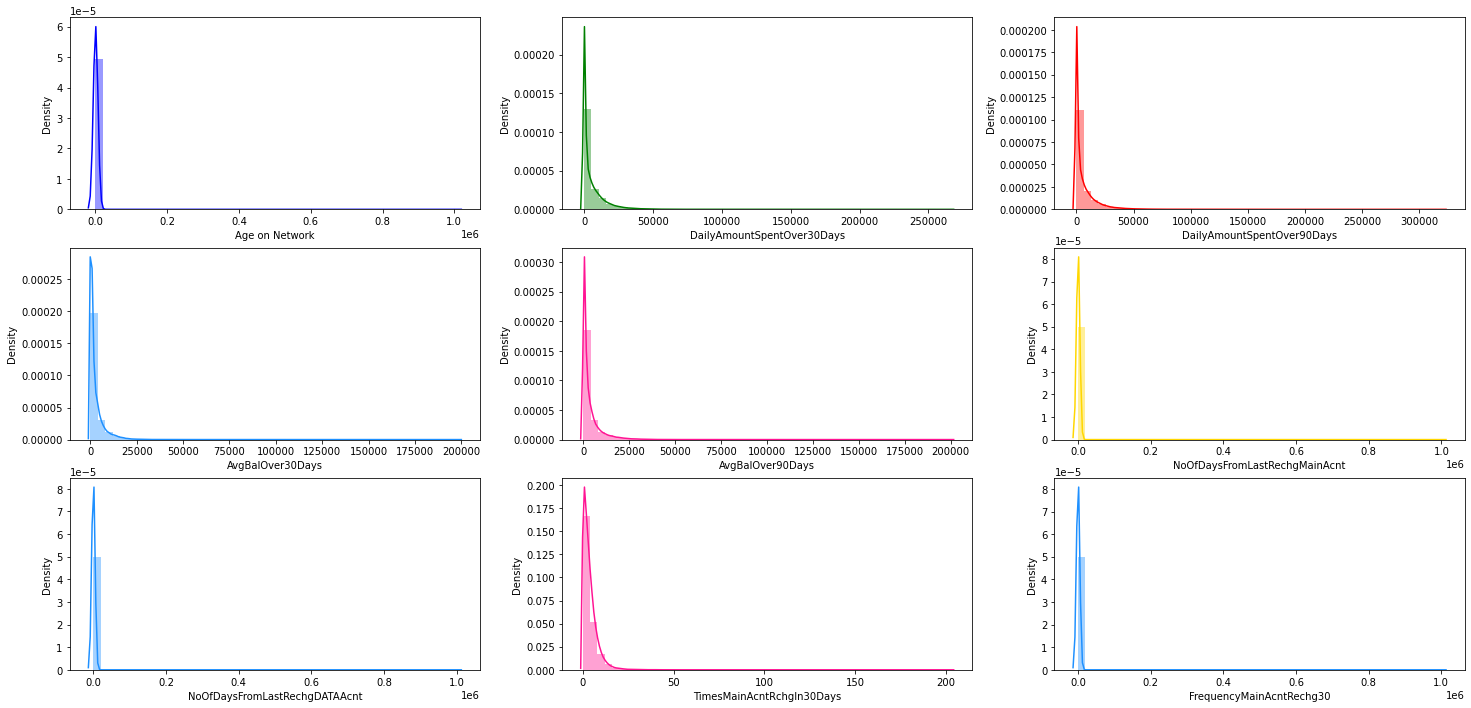

In [52]:
#checking distribution ofcolumns
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize = (25, 12))

sns.distplot(df['aon'] , color="b",ax=ax1,axlabel='Age on Network')
sns.distplot(df['daily_decr30'] , color="g",ax=ax2,axlabel='DailyAmountSpentOver30Days')
sns.distplot(df['daily_decr90'] , color="r",ax=ax3,axlabel='DailyAmountSpentOver90Days')
sns.distplot(df['rental30'] , color="dodgerblue",ax=ax4,axlabel='AvgBalOver30Days')
sns.distplot(df['rental90'] , color="deeppink",ax=ax5,axlabel='AvgBalOver90Days')
sns.distplot(df['last_rech_date_ma'] , color="gold",ax=ax6,axlabel='NoOfDaysFromLastRechgMainAcnt')
sns.distplot(df['last_rech_date_da'] , color="dodgerblue",ax=ax7,axlabel='NoOfDaysFromLastRechgDATAAcnt')
sns.distplot(df['cnt_ma_rech30'] , color="deeppink",ax=ax8,axlabel='TimesMainAcntRchgIn30Days')
sns.distplot(df['fr_ma_rech30'] , color="dodgerblue",ax=ax9,axlabel='FrequencyMainAcntRechg30')


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel='No.ofTimesDataAcntRechargedinlast30days', ylabel='Density'>

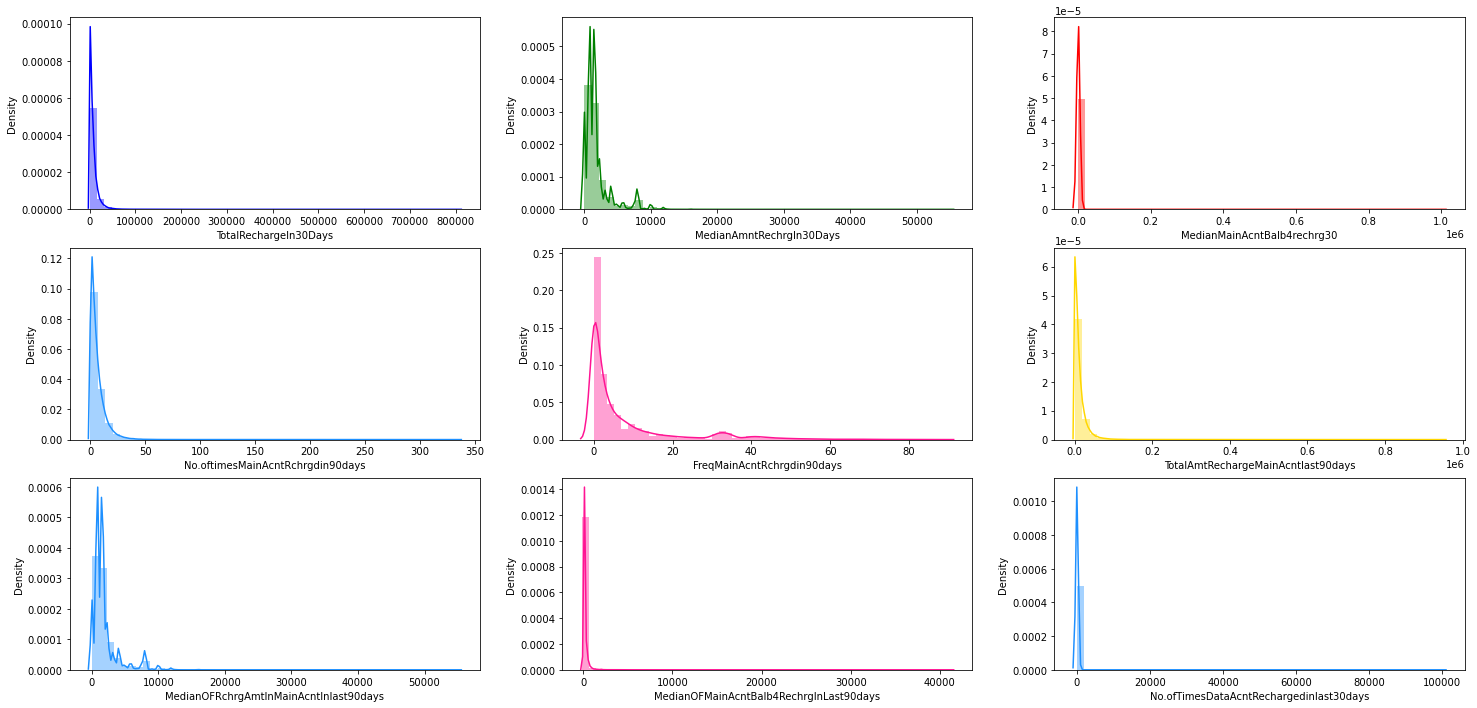

In [53]:
#checking distribution ofcolumns
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize = (25, 12))

sns.distplot(df['sumamnt_ma_rech30'] , color="b",ax=ax1,axlabel='TotalRechargeIn30Days')
sns.distplot(df['medianamnt_ma_rech30'] , color="g",ax=ax2,axlabel='MedianAmntRechrgIn30Days')
sns.distplot(df['medianmarechprebal30'] , color="r",ax=ax3,axlabel='MedianMainAcntBalb4rechrg30')
sns.distplot(df['cnt_ma_rech90'] , color="dodgerblue",ax=ax4,axlabel='No.oftimesMainAcntRchrgdin90days')
sns.distplot(df['fr_ma_rech90'] , color="deeppink",ax=ax5,axlabel='FreqMainAcntRchrgdin90days')
sns.distplot(df['sumamnt_ma_rech90'] , color="gold",ax=ax6,axlabel='TotalAmtRechargeMainAcntlast90days')
sns.distplot(df['medianamnt_ma_rech90'] , color="dodgerblue",ax=ax7,axlabel='MedianOFRchrgAmtInMainAcntInlast90days')
sns.distplot(df['medianmarechprebal90'] , color="deeppink",ax=ax8,axlabel='MedianOFMainAcntBalb4RechrgInLast90days')
sns.distplot(df['cnt_da_rech30'] , color="dodgerblue",ax=ax9,axlabel='No.ofTimesDataAcntRechargedinlast30days')


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

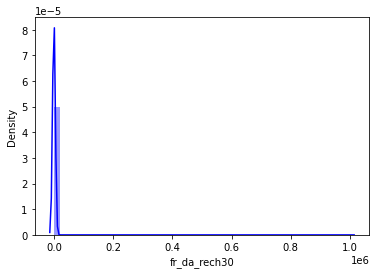

In [54]:
sns.distplot(df['fr_da_rech30'] , color="b",label='FrqncyOfDataAcntRchrgdIn30Days')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

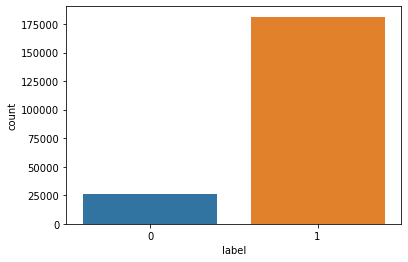

In [55]:
sns.countplot(df['label'])

OBSERVATION:
    
    We can note that there is less data about defaulters and more about those who did repay their loan.
    
    Hence can say that the data is imbalanced.

<AxesSubplot:xlabel='label', ylabel='aon'>

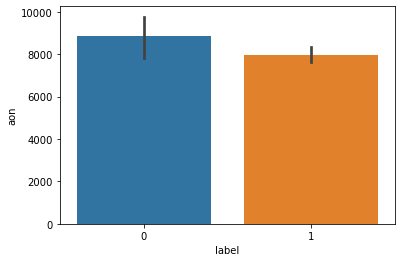

In [56]:
sns.barplot(x='label',y='aon',data=df)

OBSERVATION:
    
    With increase in Age on Network,defaulting rate is higher.

Text(0.5, 1.0, 'Daily Amount Reduced from Balance Over 30 days')

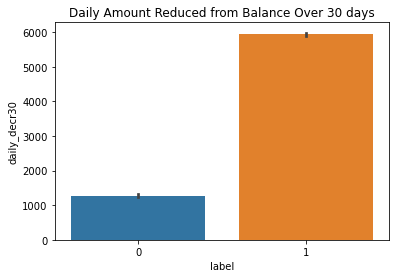

In [57]:
sns.barplot(x=df['label'],y=df['daily_decr30'])
plt.title('Daily Amount Reduced from Balance Over 30 days')

Text(0.5, 1.0, 'Average main account balance over last 30 days')

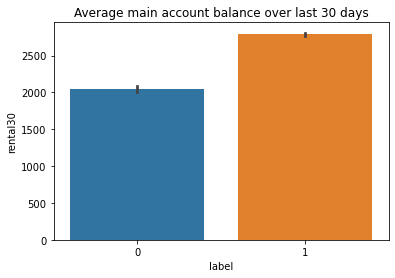

In [58]:
sns.barplot(x=df['label'],y=df['rental30'])
plt.title('Average main account balance over last 30 days')

OBSERVATION:
    
    There is huge imbalance in the data collected, 
    when compared to the imbalances,we can note that there is less difference between loan default and repayment.
    Hence can say that with the increase in Average Main balance,there is a probability of defaulting.
    
    Defaulters have  max average balance of 2000,repayers has an avg main balance over 2500

Text(0.5, 1.0, 'No.of times main account got recharged in last 30 days')

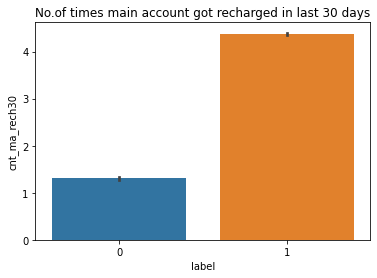

In [59]:
sns.barplot(x=df['label'],y=df['cnt_ma_rech30'])
plt.title('No.of times main account got recharged in last 30 days')

OBSERVATION:
    
    Defaulters recharged Main account max number between 1 and 2 times.
    
    whereas repayers recharged for 4 plus times.

Text(0.5, 1.0, 'Frequency of main account recharged in last 30 days')

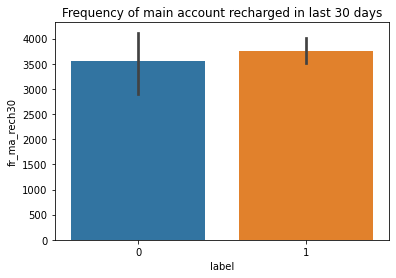

In [60]:
sns.barplot(x=df['label'],y=df['fr_ma_rech30'])
plt.title('Frequency of main account recharged in last 30 days')

OBSERVATION:
    
    With increase in frequency of Recharge in last 30 days,equal probabilities of defaulting and repayment.
    Even though there is less data about defaulting,there is high chance of defaulting with incresed recharge fdrequency.

Text(0.5, 1.0, 'Total amount of recharge in main account over last 30 days')

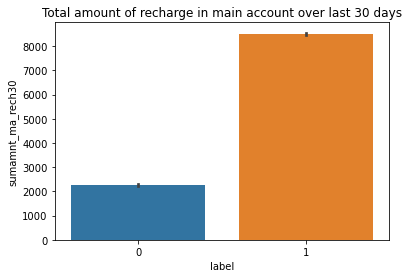

In [61]:
sns.barplot(x=df['label'],y=df['sumamnt_ma_rech30'])
plt.title('Total amount of recharge in main account over last 30 days')

OBSERVATION:
    
    the defaulters has max limit ranging between 2000 and 3000 of Total recharge amount.

Text(0.5, 1.0, 'Median of recharge  done in main account over last 30 days')

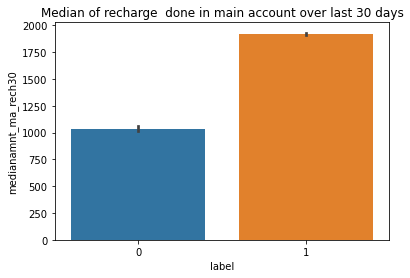

In [62]:
sns.barplot(x=df['label'],y=df['medianamnt_ma_rech30'])
plt.title('Median of recharge  done in main account over last 30 days')

OBSERVATION:
    
    On an average the defaulters has recharged for a max of 1000 indonesian rupaiah.

Text(0.5, 1.0, 'Median of Main balance before recharge in last 30 days')

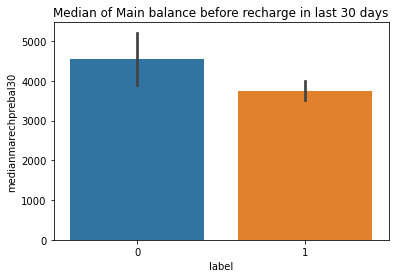

In [63]:
sns.barplot(x=df['label'],y=df['medianmarechprebal30'])
plt.title('Median of Main balance before recharge in last 30 days')

OBSERVATION:
    
    Defaulters has a medianMain account recharge amount ranging between 4000 and 5000.
    
    2)With increase in Median of Main balance recharge,probability of defaulting is very high.

Text(0.5, 1.0, 'No.of times data account got recharged in last 30 days')

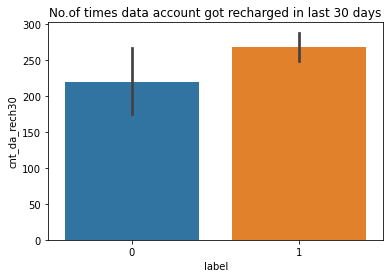

In [64]:
sns.barplot(x=df['label'],y=df['cnt_da_rech30'])
plt.title('No.of times data account got recharged in last 30 days')

OBSERVATION:
    
    1)Defaulters has recharged the data account for a maximum of 200 to 250 times.
    
    2)With increase in No.of times data accounts recharge,probability of defaulting is high.

Text(0.5, 1.0, 'Frequency of data account recharged in last 30 days')

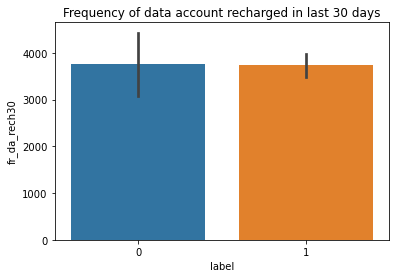

In [65]:
sns.barplot(x=df['label'],y=df['fr_da_rech30'])
plt.title('Frequency of data account recharged in last 30 days')

OBSERVATION:
    
    1)with increase in frequency of recharging  data account,higher  chances of defulting.

Text(0.5, 1.0, 'Number of loans taken by user in last 30 days')

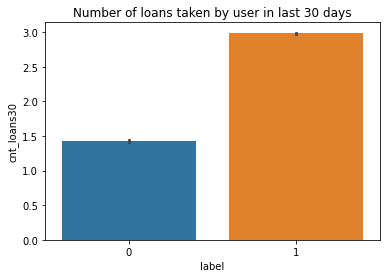

In [66]:
sns.barplot(x=df['label'],y=df['cnt_loans30'])
plt.title('Number of loans taken by user in last 30 days')

OBSERVATION:
    
    1)Defaulters has taken between 1 to 1.5 no.of loans.
    As practically there will be no 1.5 loan,considering only 1 loan.
    
    2)Those who repaid had taken maxof 3 loans.

Text(0.5, 1.0, 'Total amount of loans taken by user in last 30 days')

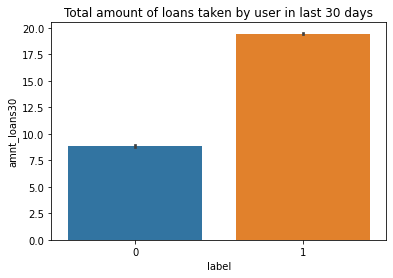

In [67]:
sns.barplot(x=df['label'],y=df['amnt_loans30'])
plt.title('Total amount of loans taken by user in last 30 days')

OBSERVATION:
    
    1)Total Amount of loans took by Defaulters varies between 7.5 and 10.
    
    2)Repayers has took 20 loans which tends to be the max limit.

Text(0.5, 1.0, 'Maximum Amount of loan taken by user in last 30 days')

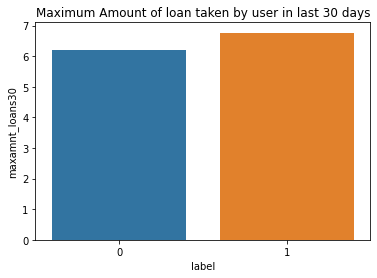

In [68]:
sns.barplot(x=df['label'],y=df['maxamnt_loans30'])
plt.title('Maximum Amount of loan taken by user in last 30 days')

OBSERVATION:
    
    A user can take Maximum  of 7 loans in 30 days.
    
    Defaulters took 6 loans whereas repayers took 7 loans. 
    
    Can say that there not a much difference in loans took by both defaulters and repayers.

Text(0.5, 1.0, 'Median of loan amount took by user in last 30 days')

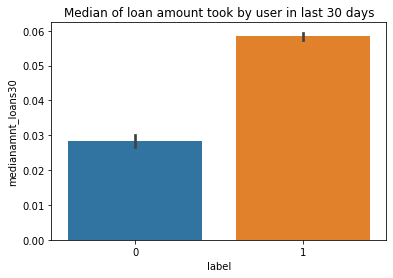

In [69]:
sns.barplot(x=df['label'],y=df['medianamnt_loans30'])
plt.title('Median of loan amount took by user in last 30 days')

OBSERVATION:
    
    Median of loan Amount by defaulters is 0.03 where as repayers took max of median amount which is 0.06

Text(0.5, 1.0, 'Average payback time in days over last 30 days')

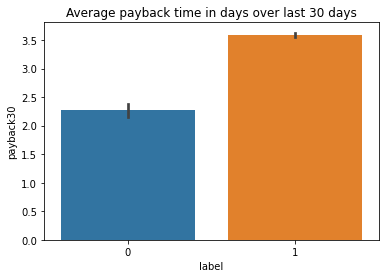

In [70]:
sns.barplot(x=df['label'],y=df['payback30'])
plt.title('Average payback time in days over last 30 days')

OBSERVATION:
    
    A potentail defaulter might repay in 2 days.
    
    Repayers took average of 3.5 days.

# 90 DAYS DATA

Text(0.5, 1.0, 'Daily amount spent from main account, averaged over last 90 days ')

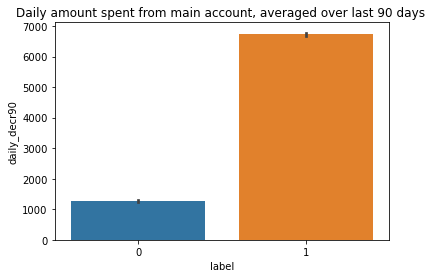

In [71]:
sns.barplot(x=df['label'],y=df['daily_decr90'])
plt.title('Daily amount spent from main account, averaged over last 90 days ')

OBSERVATION:
    In terms of daily spending from main account in span of 90 days,
    
    1)the defaulters has spent a little above 1000
    
    2)Repayers has spent 7000 rupaiah.

Text(0.5, 1.0, 'Average main account balance over last 90 days')

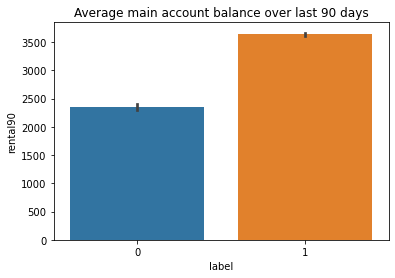

In [72]:
sns.barplot(x=df['label'],y=df['rental90'])
plt.title('Average main account balance over last 90 days')

OBSERVATION:
    In terms of Average balance over 90 days,
    
    1)Defaullters average=2000 to 2500
    
    2)Repayers average= 3500
    

Text(0.5, 1.0, 'Number of times main account got recharged in last 90 days')

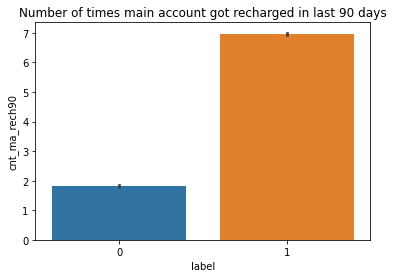

In [73]:
sns.barplot(x=df['label'],y=df['cnt_ma_rech90'])
plt.title('Number of times main account got recharged in last 90 days')

OBSERVATION:
    
    In terms of No.of times Main accounts recharged in 90 days,
    
    defaulters recharged for 2 times.
    
    repayers recharged for 7 times.

Text(0.5, 1.0, 'Frequency of main account recharged in last 90 days')

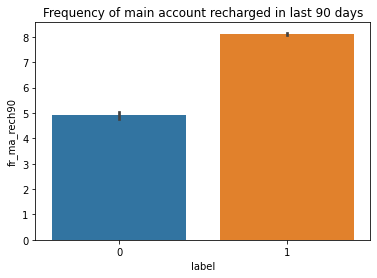

In [74]:
sns.barplot(x=df['label'],y=df['fr_ma_rech90'])
plt.title('Frequency of main account recharged in last 90 days')

OBSERVATION:
    
    In terms of Frequency of Main Account recharge in 90 days period,
    
    defaulters frequency is 5.
    
    repayers frequency is 8.

Text(0.5, 1.0, 'Total amount of recharge in main account over last 90 days')

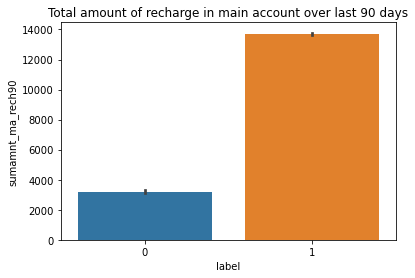

In [75]:
sns.barplot(x=df['label'],y=df['sumamnt_ma_rech90'])
plt.title('Total amount of recharge in main account over last 90 days')

OBSERVATION:
    
    In terms of Total recharge amount in 90 days,
    
    defaulters recharge amount varies from 2000 to 4000.
     Repayers recharged for 14000.

Text(0.5, 1.0, 'Median Amount of recharge done in main account over last 90 days')

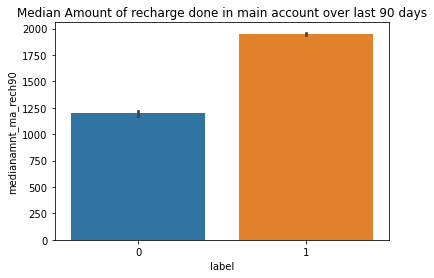

In [76]:
sns.barplot(x=df['label'],y=df['medianamnt_ma_rech90'])
plt.title('Median Amount of recharge done in main account over last 90 days')

OBSERVATION:
    
    In terms of  Recharge amount median,
    
    defaulters median-1250
    
    repayers median -2000

Text(0.5, 1.0, 'Number of times data account got recharged in last 90 days')

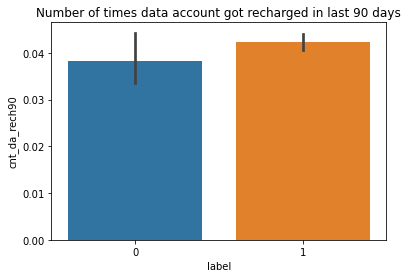

In [77]:
sns.barplot(x=df['label'],y=df['cnt_da_rech90'])
plt.title('Number of times data account got recharged in last 90 days')

OBSERVATION:
    
    In terms of No.of times data account recharged,
    
    both defaulters and repayers has approximately equal no.of recharges.

Text(0.5, 1.0, 'Frequency of data account recharged in last 90 days')

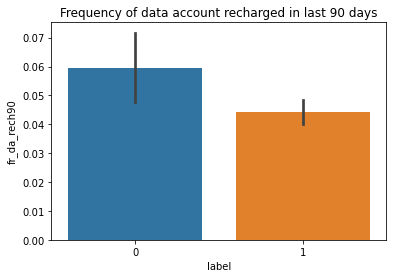

In [78]:
sns.barplot(x=df['label'],y=df['fr_da_rech90'])
plt.title('Frequency of data account recharged in last 90 days')

OBSERVATION:
    
    With increase in frequency of Data account recharge in 90 days,defaulting rate is high.

Text(0.5, 1.0, 'Number of loans taken by user in last 90 days')

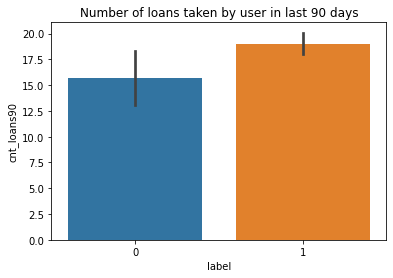

In [79]:
sns.barplot(x=df['label'],y=df['cnt_loans90'])
plt.title('Number of loans taken by user in last 90 days')

OBSERVATION:
    
    1)Defaulters took max of 15 loans
    
    2)Repayers took max of 20 loans.

Text(0.5, 1.0, 'Total amount of loans taken by user in last 90 days')

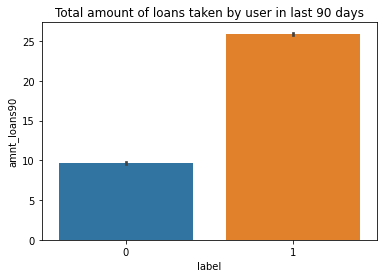

In [80]:
sns.barplot(x=df['label'],y=df['amnt_loans90'])
plt.title('Total amount of loans taken by user in last 90 days')

OBSERVATION:
    
    In total amount of loans users took,
    
    1)defaulters took max of 10 loans.
    
    2)Repayers took 25 max of loans.

Text(0.5, 1.0, 'maximum amount of loan taken by user in 90 days')

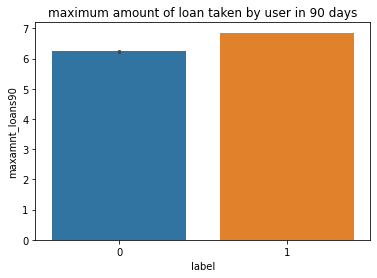

In [81]:
sns.barplot(x=df['label'],y=df['maxamnt_loans90'])
plt.title('maximum amount of loan taken by user in 90 days')

OBSERVATION:
    
    In terms of maximum loan amount,both defaulters and repayers max limit is approximately same.

Text(0.5, 1.0, 'Median of loan amount  took by the user in last 90 days')

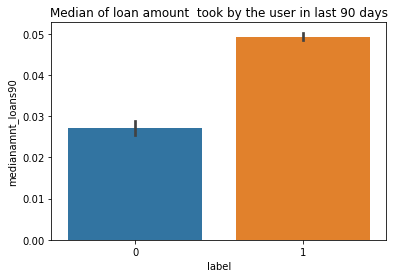

In [82]:
sns.barplot(x=df['label'],y=df['medianamnt_loans90'])
plt.title('Median of loan amount  took by the user in last 90 days')

OBSERVATION:
    
    1)Defaulters took max. median of 0.03 loan amount
    
    2)Repayers took max. median of 0.05 loan amount

Text(0.5, 1.0, 'Average payback time in days over last 90 days')

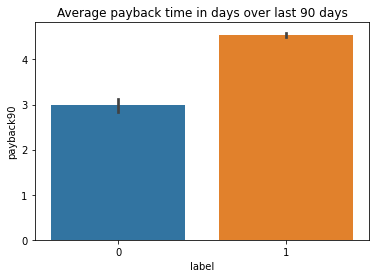

In [83]:
sns.barplot(x=df['label'],y=df['payback90'])
plt.title('Average payback time in days over last 90 days')

OBSERVATION:
    
    Average pay back time of potential defaulter in 90 days is 3 days.
    
    Average pay back time of repayer in 90 days is greater than 4 days.

<AxesSubplot:xlabel='label', ylabel='Month'>

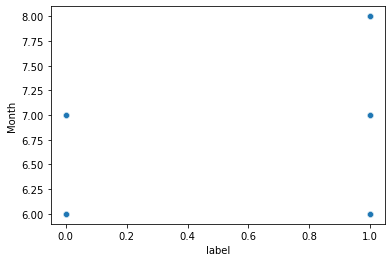

In [84]:
sns.scatterplot(x=df['label'],y=df['Month'])


# CHECKING FOR OUTLIERS:

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='amnt_loans30'>

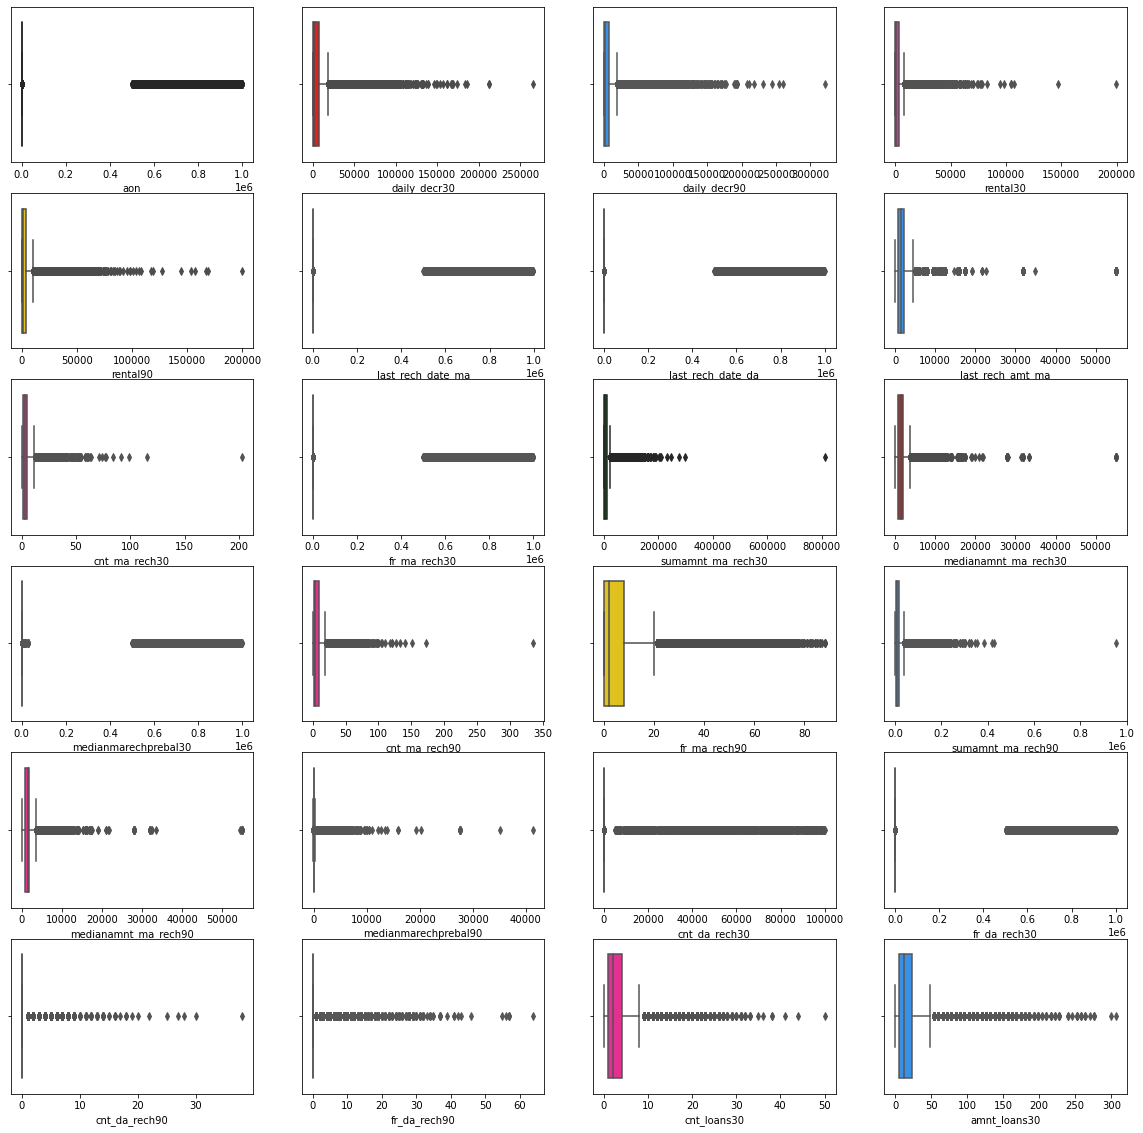

In [85]:
#checking outliers in columns
fig, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7, ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),(ax21,ax22,ax23,ax24)) = plt.subplots(nrows=6, ncols=4, figsize = (20, 20))


sns.boxplot(df['aon'] , color="g",ax=ax1)
sns.boxplot(df['daily_decr30'] , color="r",ax=ax2)
sns.boxplot(df['daily_decr90'] , color="dodgerblue",ax=ax3)
sns.boxplot(df['rental30'] , color="deeppink",ax=ax4)
sns.boxplot(df['rental90'] , color="gold",ax=ax5)
sns.boxplot(df['last_rech_date_ma'] , color="dodgerblue",ax=ax6)
sns.boxplot(df['last_rech_date_da'] , color="deeppink",ax=ax7)
sns.boxplot(df['last_rech_amt_ma'] , color="dodgerblue",ax=ax8)
sns.boxplot(df['cnt_ma_rech30'] , color="deeppink",ax=ax9)
sns.boxplot(df['fr_ma_rech30'] , color="dodgerblue",ax=ax10)
sns.boxplot(df['sumamnt_ma_rech30'] , color="g",ax=ax11)
sns.boxplot(df['medianamnt_ma_rech30'] , color="r",ax=ax12)
sns.boxplot(df['medianmarechprebal30'] , color="dodgerblue",ax=ax13)
sns.boxplot(df['cnt_ma_rech90'] , color="deeppink",ax=ax14)
sns.boxplot(df['fr_ma_rech90'] , color="gold",ax=ax15)
sns.boxplot(df['sumamnt_ma_rech90'] , color="dodgerblue",ax=ax16)
sns.boxplot(df['medianamnt_ma_rech90'] , color="deeppink",ax=ax17)
sns.boxplot(df['medianmarechprebal90'] , color="dodgerblue",ax=ax18)
sns.boxplot(df['cnt_da_rech30'] , color="deeppink",ax=ax19)
sns.boxplot(df['fr_da_rech30'] , color="dodgerblue",ax=ax20)
sns.boxplot(df['cnt_da_rech90'] , color="deeppink",ax=ax21)
sns.boxplot(df['fr_da_rech90'] , color="dodgerblue",ax=ax22)
sns.boxplot(df['cnt_loans30'] , color="deeppink",ax=ax23)
sns.boxplot(df['amnt_loans30'] , color="dodgerblue",ax=ax24)


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='Date'>

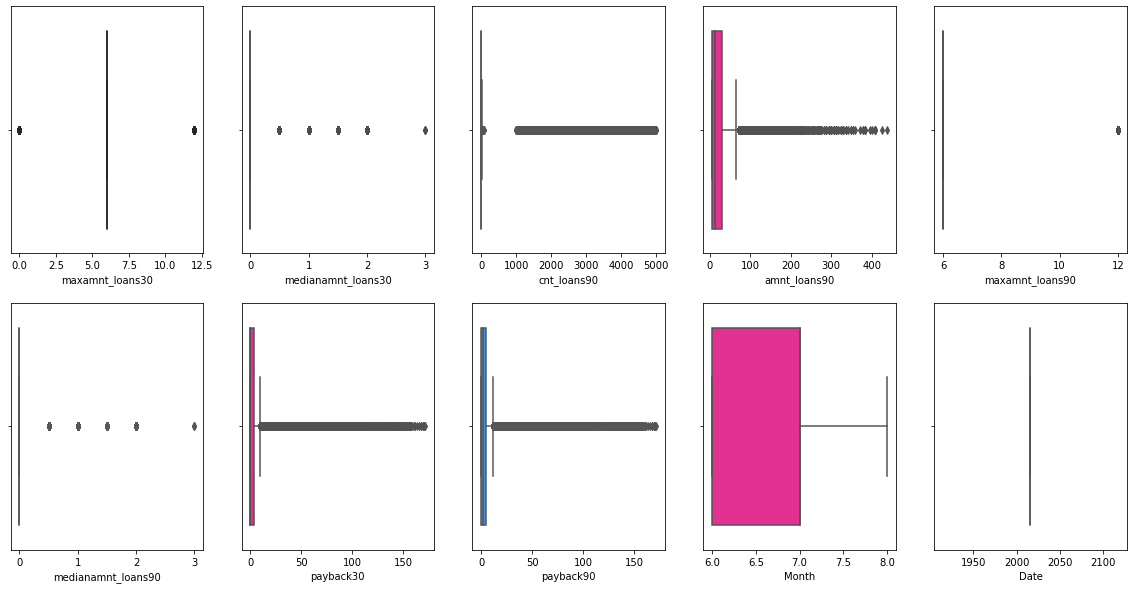

In [86]:

fig, ((ax1, ax2,ax3,ax4,ax5),(ax6,ax7, ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (20, 10))


sns.boxplot(df['maxamnt_loans30'] , color="g",ax=ax1)
sns.boxplot(df['medianamnt_loans30'] , color="r",ax=ax2)
sns.boxplot(df['cnt_loans90'] , color="dodgerblue",ax=ax3)
sns.boxplot(df['amnt_loans90'] , color="deeppink",ax=ax4)
sns.boxplot(df['maxamnt_loans90'] , color="gold",ax=ax5)
sns.boxplot(df['medianamnt_loans90'] , color="dodgerblue",ax=ax6)
sns.boxplot(df['payback30'] , color="deeppink",ax=ax7)
sns.boxplot(df['payback90'] , color="dodgerblue",ax=ax8)
sns.boxplot(df['Month'] , color="deeppink",ax=ax9)
sns.boxplot(df['Date'] , color="dodgerblue",ax=ax10)


OBSERVATION:
    
    We can note that except Month and date column, outliers are present in almost every column.
    
    

# EDA CONCLUSION:

1) We can note that there is less data about defaulters and more about those who did repay their loan. Hence can say that the data is imbalanced.

2) With increase in Age on Network, defaulting rate is higher.


The data is collected based on  different parameters for two time periods. One observation is for 30 days and other is for 90 days. Analyzing the parameters separately.


For 30 days:

Average main account balance over last 30 days:
There is huge imbalance in the data collected,when compared to the imbalances, we can note that there is less difference between loan default and repayment. Hence can say that with the increase in Average Main balance,there is a probability of defaulting.

No.of times main account got recharged in last 30 days:
Defaulters recharged Main account max number between 1 and 2 times.whereas repayers recharged for 4 plus times.

Frequency of main account recharged in last 30 days:
With increase in frequency of Recharge in last 30 days, equal probabilities of defaulting and repayment. Even though there is less data about defaulting, there is high chance of defaulting with increased recharge frequency.

Total amount of recharge in main account over last 30 days:
The defaulters has max limit ranging between 2000 and 3000 of Total recharge amount.

Median of recharge  done in main account over last 30 days:
On an average the defaulters has recharged for a max of 1000 indonesian rupaiah.

Median of Main balance before recharge in last 30 days:
Defaulters has a Main account recharge median amount ranging between 4000 and 5000. With increase in Median of Main balance recharge, probability of defaulting is very high.

No.of times data account got recharged:
Defaulters has recharged the data account for a maximum of 200 to 250 times. With increase in No.of times data accounts recharge, probability of defaulting is high.

Frequency of data account recharged:
with increase in frequency of recharging  data account, higher  chances of defaulting.

Number of loans taken by user:
1)	Defaulters has taken between 1 to 1.5 no.of loans. As practically there will be no 1.5 loan, considering only 1 loan.
2) Those who repaid had taken max of 3 loans.

Total amount of loans taken by user:
1)Total Amount of loans took by Defaulters varies between 7.5 and 10   
2)Repayers has took 20 loans which tends to be the max limit.

Maximum Amount of loan taken by user:
A user can take Maximum  of 7 loans in 30 days.Defaulters took 6 loans whereas repayers took 7 loans. Can say that there not a much difference in loans took by both defaulters and repayers.

Median of loan amount took by user:
Median of loan Amount by defaulters is 0.03 where as repayers took max of median amount which is 0.06

Average payback time in days over last 30 days:
A potentail defaulter might repay in 2 days. Repayers took average of 3.5 days.

BASED ON 90 DAYS:


Daily amount spent from main account:
In terms of daily spending from main account in span of 90 days,
 1)the defaulters has spent a little above 1000
  2)Repayers has spent 7000 rupaiah.

Average main account balance:
 In terms of Average balance over 90 days,
 1)Defaullters average=2000 to 2500 2)Repayers average= 3500

Number of times main account got recharged:
In terms of No.of times Main accounts recharged in 90 days, defaulters recharged for 2 times. Re-payers recharged for 7 times.

Frequency of main account recharge:
In terms of Frequency of Main Account recharge in 90 days period, defaulters frequency is 5, Re-payers frequency is 8.

Total amount of recharge in main account:
In terms of Total recharge amount in 90 days ,defaulters recharge amount varies from 2000 to 4000. Repayers recharged for 14000.
In terms of  Recharge amount median,defaulters median-1250,repayers median -2000
In terms of No.of times data account recharged,
both defaulters and repayers has approximately equal no.of recharges.

Frequency of data account recharge:
With increase in frequency of Data account recharge in 90 days,defaulting rate is high.

Number of loans taken by user:
1)Defaulters took max of 15 loans
 2)Repayers took max of 20 loans.

In total amount of loans users took,
1)defaulters took max of 10 loans.
 2)Repayers took 25 max of loans.

In terms of maximum loan amount,both defaulters and repayers max limit is approximately same.

Median of loan amount  took by the user:
 1)Defaulters took max. median of 0.03 loan amount
  2)Repayers took max. median of 0.05 loan amount

Average pay back time of potential defaulter in 90 days is 3 days. Average pay back time of repayer in 90 days is greater than 4 days.


    


In [87]:
for col in df.columns:
        
        print("No.of unique values in ",col,"::",df[col].nunique())

No.of unique values in  label :: 2
No.of unique values in  msisdn :: 184235
No.of unique values in  aon :: 4473
No.of unique values in  daily_decr30 :: 145888
No.of unique values in  daily_decr90 :: 154109
No.of unique values in  rental30 :: 128188
No.of unique values in  rental90 :: 135264
No.of unique values in  last_rech_date_ma :: 1143
No.of unique values in  last_rech_date_da :: 1155
No.of unique values in  last_rech_amt_ma :: 69
No.of unique values in  cnt_ma_rech30 :: 71
No.of unique values in  fr_ma_rech30 :: 1069
No.of unique values in  sumamnt_ma_rech30 :: 15112
No.of unique values in  medianamnt_ma_rech30 :: 509
No.of unique values in  medianmarechprebal30 :: 23722
No.of unique values in  cnt_ma_rech90 :: 110
No.of unique values in  fr_ma_rech90 :: 89
No.of unique values in  sumamnt_ma_rech90 :: 31624
No.of unique values in  medianamnt_ma_rech90 :: 607
No.of unique values in  medianmarechprebal90 :: 22497
No.of unique values in  cnt_da_rech30 :: 1056
No.of unique values in  

# PLOTTING CORRELATIONS

In [88]:
#msisdn is nothing but phone number of the user,it has nothing to do with the predictions of loan payment
#so dropping the msisdn column
df.drop(['msisdn'],axis=1,inplace=True)

In [89]:
df_Cor=df.corr()
df_Cor['label']

label                   1.000000
aon                    -0.003900
daily_decr30            0.168267
daily_decr90            0.166020
rental30                0.057860
rental90                0.075098
last_rech_date_ma       0.003676
last_rech_date_da       0.001772
last_rech_amt_ma        0.131744
cnt_ma_rech30           0.239399
fr_ma_rech30            0.001274
sumamnt_ma_rech30       0.204252
medianamnt_ma_rech30    0.142047
medianmarechprebal30   -0.004820
cnt_ma_rech90           0.237831
fr_ma_rech90            0.084565
sumamnt_ma_rech90       0.206712
medianamnt_ma_rech90    0.120616
medianmarechprebal90    0.040006
cnt_da_rech30           0.003832
fr_da_rech30           -0.000075
cnt_da_rech90           0.003253
fr_da_rech90           -0.005243
cnt_loans30             0.201600
amnt_loans30            0.202318
maxamnt_loans30         0.087468
medianamnt_loans30      0.045556
cnt_loans90             0.004902
amnt_loans90            0.204055
maxamnt_loans90         0.101247
medianamnt

<AxesSubplot:>

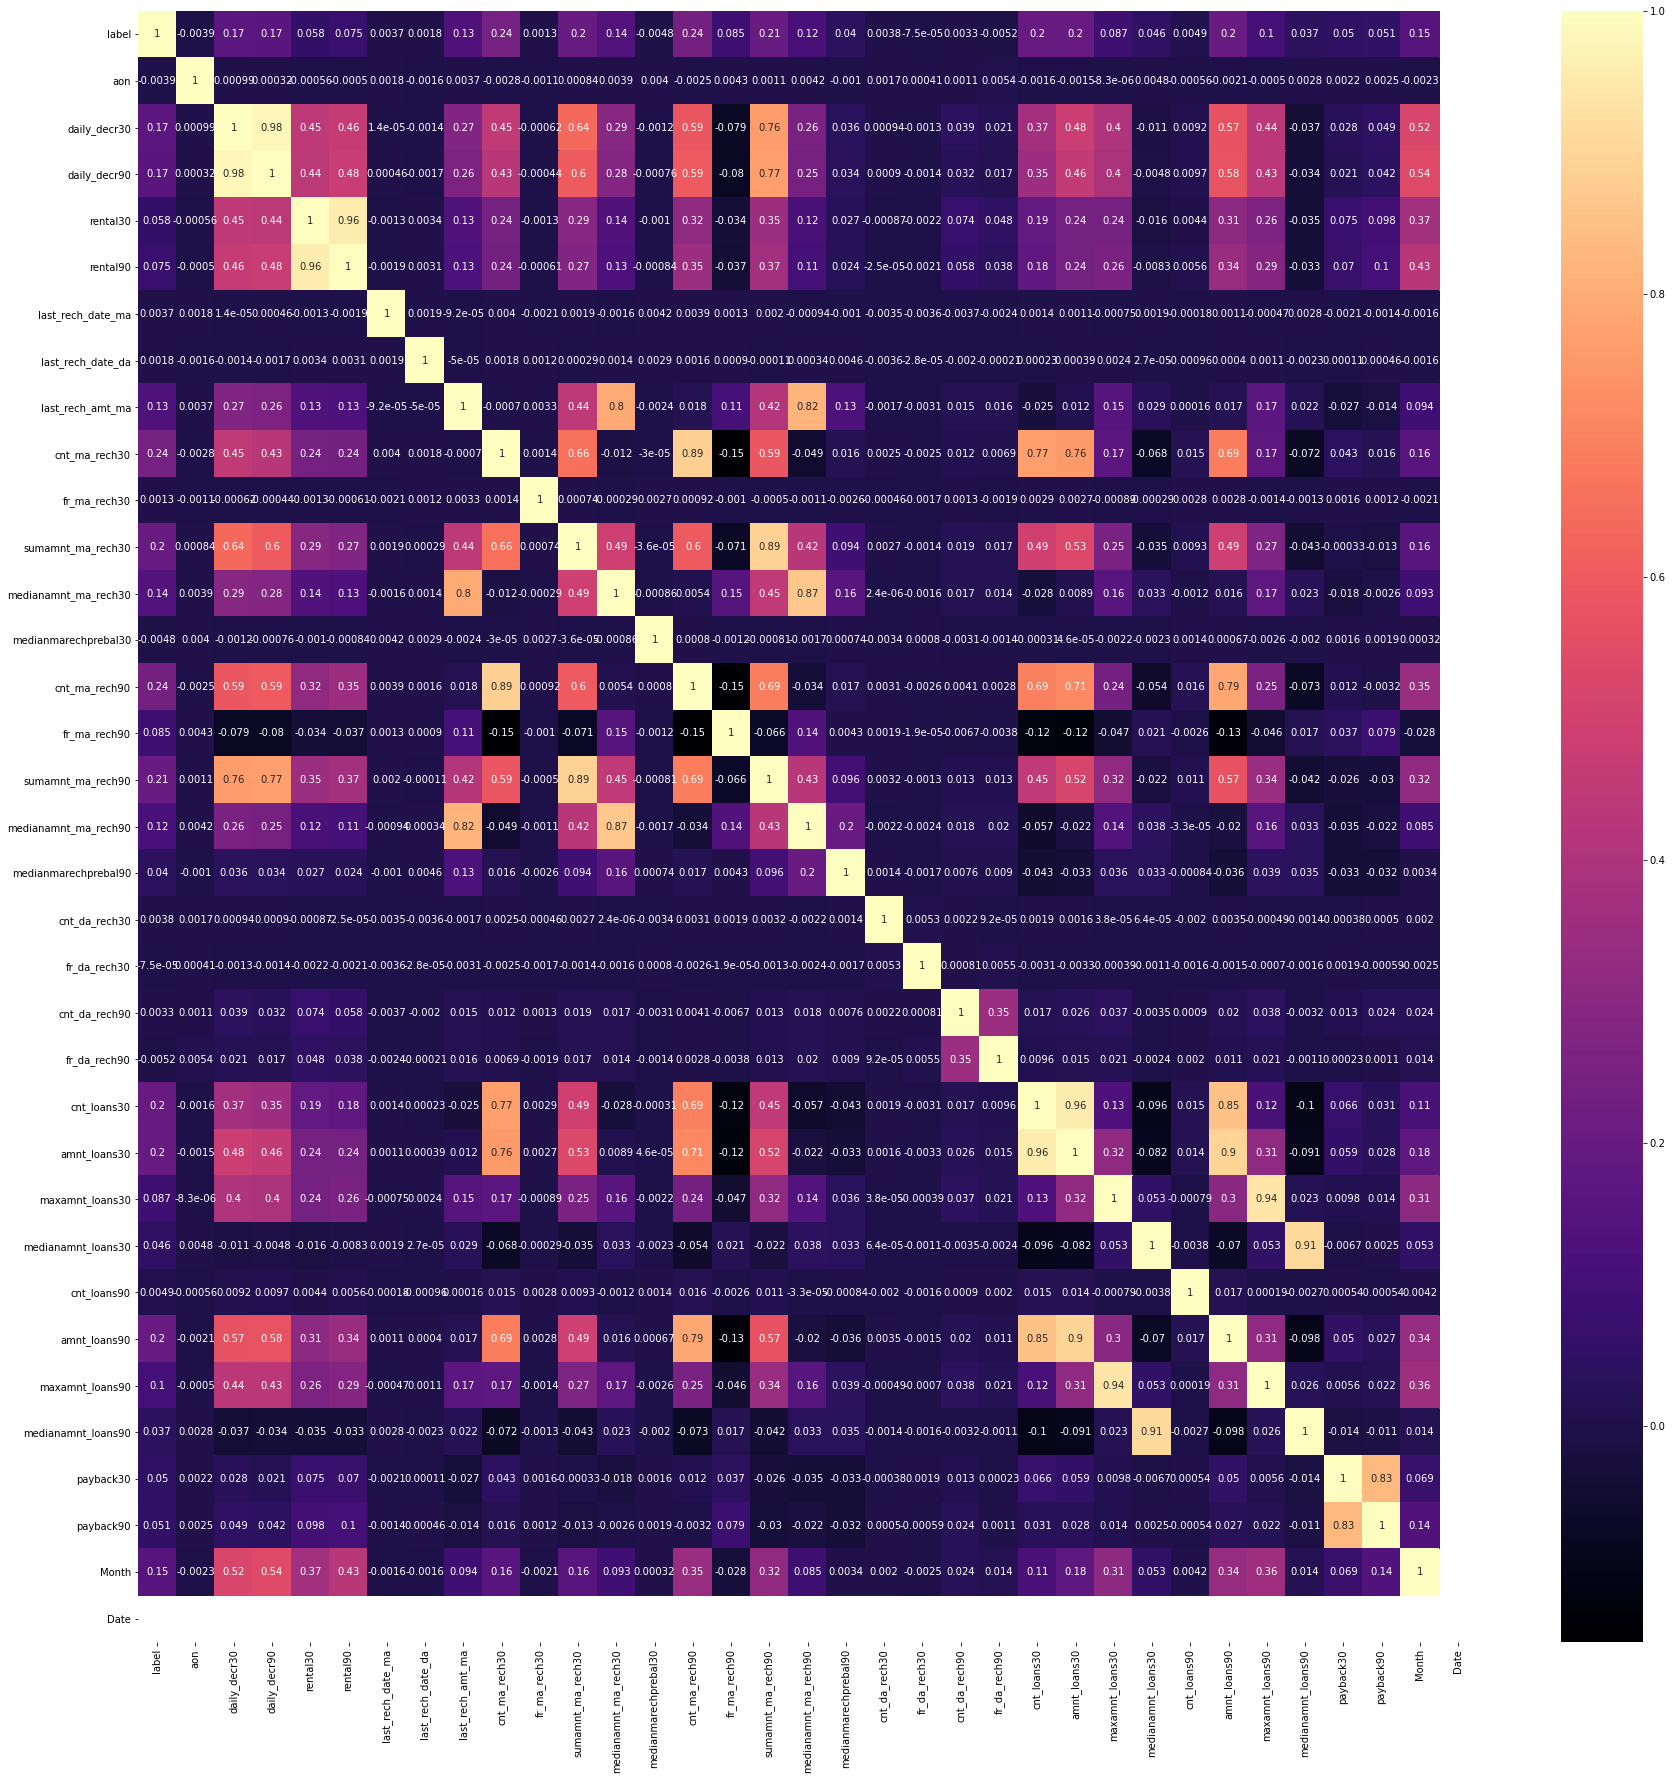

In [90]:
plt.figure(figsize=(30,30))
sns.heatmap(df_Cor,cmap='magma',annot=True)

# OUTLIER REMOVAL:
    

In [91]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([    21,     22,     22, ..., 207543, 207544, 207544], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [92]:
df1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df1.shape)

with outliers:: (207550, 35)
After removing outliers:: (0, 35)


OBSERVATION:
    
    22% of data removed through z score.

# IQR METTHOD:

In [93]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

393.0

In [94]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [95]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(52807, 35)


OBSERVATION:
    
    Huge amounts of data is removed through IQR ,hence can say IQR is not recommended for outlier removal

# NOTE:

As it has been mentioned that data removed from outlier treatment should not exceed 7 to 8%,

Zscore causes 22% data loss and IQR causes 84.5% data loss.

Another technique is replacing the outlier data with mean or median.But when we obserfve this data set there is a huge difference between minimum and maximum values.If we calculate mean or median it wont give appropriate values as it includes the outlier value(maximum ones).So not using this approach.
 
As we are not dropping the outliers, another approach is capping or winsorization of outliers.

using percentile capping. Values that are less than the value at 10th percentile are replaced by 10th percentile value , and values  greater than 90th percentile are replaced by 90th percentile value.


In [96]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Month', 'Date'],
      dtype='object')

In [97]:
cols=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in cols:
            FloorQ=df[i].quantile(0.10)
            CeilQ=df[i].quantile(0.90)
            df[i] = np.where(df[i] <FloorQ,FloorQ,df[i])
            df[i] = np.where(df[i] >CeilQ,CeilQ,df[i])
            print(i,"->",df[i].skew())

aon -> 0.5284793206435929
daily_decr30 -> 1.0935453721579915
daily_decr90 -> 1.1543224310680835
rental30 -> 1.1265741276622285
rental90 -> 1.1558700165194151
last_rech_date_ma -> 1.1987272241492852
last_rech_date_da -> 0
last_rech_amt_ma -> 0.8359061321231329
cnt_ma_rech30 -> 0.6277453849914029
fr_ma_rech30 -> 1.0070623988221368
sumamnt_ma_rech30 -> 0.7588124242088926
medianamnt_ma_rech30 -> 0.9295986608192282
medianmarechprebal30 -> 1.3584623130969395
cnt_ma_rech90 -> 0.7670588467394291
fr_ma_rech90 -> 1.5893409860791652
sumamnt_ma_rech90 -> 0.8543081510966238
medianamnt_ma_rech90 -> 0.9684104269012621
medianmarechprebal90 -> 1.258477107838736
cnt_da_rech30 -> 0
fr_da_rech30 -> 0
cnt_da_rech90 -> 0
fr_da_rech90 -> 0
cnt_loans30 -> 0.8910588387118499
amnt_loans30 -> 0.7816448336192705
maxamnt_loans30 -> 2.2568424305116785
medianamnt_loans30 -> 0
cnt_loans90 -> 1.017641178749645
amnt_loans90 -> 0.9564054554835316
maxamnt_loans90 -> 2.224470801656892
medianamnt_loans90 -> 0
payback30 -> 

In [98]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,...,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.0
mean,0.873948,637.677639,4224.630321,4664.158439,2148.837527,2720.963114,5.044625,0.0,1660.528861,3.537909,...,6.754777,0.0,3.331279,20.643180,6.769116,0.0,2.199570,2.804969,6.787560,2016.0
std,0.331908,433.902329,5369.966356,6076.149249,2379.411441,3081.028838,4.925487,0.0,1231.349189,2.876785,...,1.989722,0.0,2.672582,16.275252,2.005785,0.0,2.768133,3.382969,0.737225,0.0
min,0.000000,132.000000,8.674800,8.783167,66.929000,74.300000,1.000000,0.0,0.000000,0.000000,...,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000,6.000000,2016.0
25%,1.000000,246.000000,41.760000,41.979500,299.690000,326.340000,1.000000,0.0,770.000000,1.000000,...,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000,6.000000,2016.0
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,0.0,1539.000000,3.000000,...,6.000000,0.0,2.000000,12.000000,6.000000,0.0,0.000000,1.714286,7.000000,2016.0
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,0.0,2309.000000,5.000000,...,6.000000,0.0,5.000000,30.000000,6.000000,0.0,3.800000,4.500000,7.000000,2016.0
max,1.000000,1410.000000,15564.200000,17720.215000,7277.106000,9422.277000,16.000000,0.0,4067.000000,9.000000,...,12.000000,0.0,9.000000,54.000000,12.000000,0.0,8.000000,10.000000,8.000000,2016.0


OBSERVATION:
    
    We can notice that there is difference in the max values of almost all columns after using the capping technique.

In [99]:
#seggregating data into X and Y
x=df.drop(['label'],axis=1)
y=df['label']

In [100]:
#scaling X vlues
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

In [101]:
x.shape

(207550, 34)

In [102]:
y.shape

(207550,)

In [103]:
#skewness removal
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Imbalanced learn

In [104]:
from imblearn.under_sampling import RandomUnderSampler

UnderSample = RandomUnderSampler(sampling_strategy='majority')
x_us, y_us = UnderSample.fit_resample(x, y)

print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_us.shape)

original  Target dataset shape: (207550,)
Resample Target dataset shape (52324,)


In [105]:
print('original  Independent dataset shape:',x.shape)
print('Resample Independent dataset shape',x_us.shape)

original  Independent dataset shape: (207550, 34)
Resample Independent dataset shape (52324, 34)


In [106]:
 from collections import Counter

In [107]:
print(" target distribution before sampling :",Counter(y))

 target distribution before sampling : Counter({1: 181388, 0: 26162})


In [108]:
print(" target distribution after sampling :",Counter(y_us))

 target distribution after sampling : Counter({0: 26162, 1: 26162})


OBSERVATION:
    
    We can note that before performing Random under sampling, the data is unevenly distributed.
    
    there are 181388 records of repayers and 26162 record of defaulters.If we feed this data into the model, 
    it may give biased prediction.
    
    So,performed undersampling.After performing undersampling we can note that equal no.of records are fetched for both defauters and repayers.

# MODEL BUILDING:

In [109]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# SPLITTING X AND Y:

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x_us,y_us,test_size=.33,random_state=42)

# USING UNDER SAMPLING::
        
        

# LOGISTIC REGRESSION

In [111]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(logreg_score))


cross validation score for svm: 0.7737366454513444


In [112]:
logreg.fit(x_train,y_train)
predicted_logreg=logreg.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_logreg))
print('Precision: ', precision_score(y_test, predicted_logreg))
print('Recall: ',recall_score(y_test, predicted_logreg))
print('F-measure:',f1_score(y_test, predicted_logreg))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

Accuracy score:: 0.7756993108241154
Precision:  0.7869701348747592
Recall:  0.7564532932052321
F-measure: 0.7714100218379273
Training accuracy:: 0.7729697350029952
Test accuracy:: 0.7756993108241154


# DECISION TREE CLASSIFIER:

In [113]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.7494648628528765


In [114]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_dtc))
print('Precision: ', precision_score(y_test, predicted_dtc))
print('Recall: ',recall_score(y_test, predicted_dtc))
print('F-measure:',f1_score(y_test, predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

Accuracy score:: 0.7467423408814502
Precision:  0.7499414108272792
Recall:  0.7408264845468225
F-measure: 0.7453560822220929
Training accuracy:: 0.9967196280343441
Test accuracy:: 0.7467423408814502


# KNeighborsClassifier:

In [115]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))



cross validation score for knn: 0.7739469814190597


In [116]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_knn))
print('Precision: ', precision_score(y_test, predicted_knn))
print('Recall: ',recall_score(y_test, predicted_knn))
print('F-measure:',f1_score(y_test, predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

Accuracy score:: 0.7747726877859501
Precision:  0.7912680892813343
Recall:  0.7468456997337655
F-measure: 0.7684154111832311
Training accuracy:: 0.837236500556237
Test accuracy:: 0.7747726877859501


# RandomForestClassifier:

In [117]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.817254058599292


In [118]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_rfc))
print('Precision: ', precision_score(y_test, predicted_rfc))
print('Recall: ',recall_score(y_test, predicted_rfc))
print('F-measure:',f1_score(y_test, predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

Accuracy score:: 0.8179764869404066
Precision:  0.8165169315825846
Recall:  0.8205810857738164
F-measure: 0.8185439639743664
Training accuracy:: 0.9966911030607297
Test accuracy:: 0.8179764869404066


# ENSEMBLE TECHNIQUES:

# 1.ADA BOOST CLASSIFIER

In [119]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))


cross validation score for Ada boost: 0.8069146576857872


In [120]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))


Accuracy score:: 0.8086523426188683
Training accuracy:: 0.8081410274695496
Test accuracy:: 0.8086523426188683


In [121]:
print('Precision: ', precision_score(y_test, predicted_adb))
print('Recall: ',recall_score(y_test, predicted_adb))
print('F-measure:',f1_score(y_test, predicted_adb))

Precision:  0.8243161094224924
Recall:  0.7848130570667902
F-measure: 0.804079696394687


# 2.BAGGING CLASSIFIER

In [122]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))


cross validation score for BAGGING Classifier: 0.7969003241017514


In [123]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))


Accuracy score:: 0.7969537267620316
Training accuracy:: 0.9835696151981059
Test accuracy:: 0.7969537267620316


# 3.Gradient Boosting classifier

In [124]:
grbc=BaggingClassifier()
grbc_score=cross_val_score(grbc,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(grbc_score))

cross validation score for BAGGING Classifier: 0.7973781565003556


In [125]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))


Accuracy score:: 0.7962008455435223
Training accuracy:: 0.9845679892746099
Test accuracy:: 0.7962008455435223


OBSERVATION:
    
    Choosing Adaboost classifier because there both train and test accuracies are same.
    Rest of the two models there is huge difference between train and test accuracies so not considering them.

# HYPER PARAMETER TUNING:

In [126]:
parameters={
    'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5],
    'algorithm':['SAMME', 'SAMME.R']
}

In [127]:
adb_grid=GridSearchCV(AdaBoostClassifier(),parameters,cv=10,scoring='accuracy')

In [128]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Accuracy after parameter tuning:: 0.8113163838535936


OBSERVATION:
    
    We can observe that accuracy score increased after tuning hyper Parameters

In [129]:
 from sklearn.metrics import classification_report

In [130]:

print("CLASSIFICATION REORT::\n",classification_report(y_test, adb_pred))

CLASSIFICATION REORT::
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      8628
           1       0.83      0.79      0.81      8639

    accuracy                           0.81     17267
   macro avg       0.81      0.81      0.81     17267
weighted avg       0.81      0.81      0.81     17267



<AxesSubplot:>

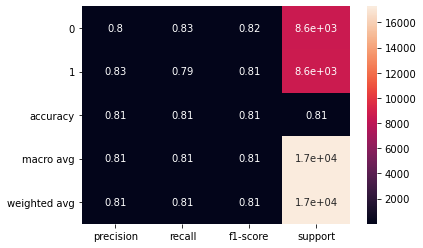

In [131]:
clsf_repo = classification_report(y_test,adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [132]:
from sklearn.metrics import roc_auc_score

In [133]:

print("roc auc score::",roc_auc_score(y_test, adb_pred))

roc auc score:: 0.8113311387808401


In [134]:
from sklearn.metrics import roc_curve

In [135]:
fpr1, tpr1, thresh1 = roc_curve(y_test, adb_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predicted_dtc, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predicted_rfc, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predicted_knn, pos_label=1)

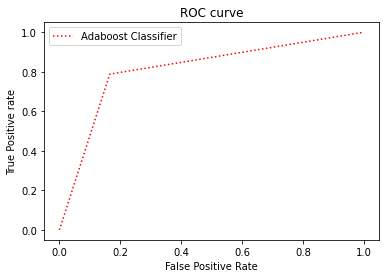

In [136]:
#plotting ROC CURVE

plt.plot(fpr1, tpr1, linestyle=':',color='red', label='Adaboost Classifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# SAVING  MODEL:

In [137]:
import joblib

In [138]:
joblib.dump(adb_grid.best_estimator_,'MicroCreditDefaulterPrediction.obj')

['MicroCreditDefaulterPrediction.obj']